<b><font size="6">|Clustering|Penguins Species Identification</font></b>

* **Author**: Dean
* **Student ID**: 600367
* **Date:**: 23-June-2025

<b><font size="5">Instructions</font></b>

Carefully read and follow these instructions:

- Enter your personal details in the cell above.
- All practical work must be uploaded to `BC Connect` on the completion of the test/examination, using the following file name convention:
  - **`07.CAS.001_Surname_Firstname_StudentID.ipynb`**. 
  - You **MUST** replace **Surname** with your surname
  - You **MUST** replace **Firstname** with your firstname
  - You **MUST** replace **StudentID** with your student id.
- You must submit this `.ipynb` with the above file name format.
- **Only** submit the single notebook file. No zip files will be accepted.
- Submit on *BC Connect* before the indicated time expires.
- Ensure that **all** cells run before submitting.
- Use the IPython command **display()** (and *not* **print()**) when required to display dataframes.
- The **marks** cells contain the allocated marks for each section. (**DO NOT DELETE OR EDIT THEM!**)

**You must add/insert the necessary code cell after the instruction block with your code.**

<b><font size="5">Problem Formulation</font></b>

Data has been collected on physical characteristics of a variety of penguin species. 

The data consists of 5 columns:
  - **culmen_length_mm:** culmen length (mm)
  - **culmen_depth_mm:** culmen depth (mm)
  - **flipper_length_mm:** flipper length (mm)
  - **body_mass_g:** body mass (g)
  - **sex:** penguin sex

The dataset is provided in the attached csv file: **penguins.csv**.

**Note**:
- The data (sex) column contains some **NA or invalid** values. You may need to remove these.
- There are huge and unrealistic outliers in the flipper length variable. You may want to remove these points.

Based on the physical characteristics, determine the number of species that can be identified using **K-Means algorithm**, based on the instructions and requirements below.


In [236]:
marks = 0

In [237]:
# This is required to prevent warning from k-means in scikit-learn
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Import Libraries

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<p>Import all required libraries <b>[2 marks]</b></p>

Marks will be deducted for unnecessary libraries.   
    
<b>Insert your code cell after this.</b>
</div>

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
# from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [239]:
marks += 2

# Load the Data

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<p>Load the dataset</p>
    
<b>Insert your code cell after this.</b> 
</div>

In [240]:
df = pd.read_csv(r"./penguins.csv")

In [241]:
marks += 1

## Data Inspection

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p>Display the first few rows of the dataframe.</p>
    
<b>Insert your code cell after this.</b>     
</div>

In [242]:
display(df.head())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181,3750,MALE
1,39.5,17.4,186,3800,FEMALE
2,40.3,18.0,195,3250,FEMALE
3,36.7,19.3,193,3450,FEMALE
4,39.3,20.6,190,3650,MALE


In [243]:
marks += 1

## Inspect information about the dataframe 

Display all available information about the dataframe.

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Display dataframe information.</p>
    
<b>Insert your code cell after this.</b>
</div>

In [244]:
display(df.info())
display(df.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    int64  
 3   body_mass_g        342 non-null    int64  
 4   sex                335 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 13.5+ KB


None

culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  335
dtype: int64

In [245]:
marks += 1

## View the Descriptive Statistics

Extract various descriptive statistics from the dataset, including the mean/standard deviation, mmin, max, etc.

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Display descriptive statistics with statistical parameters as column headings.</p>

Display various descriptive statistics from the dataset, including the mean/standard deviation, mmin, max, etc.
    
Do not use print()  
    
<b>Insert your code cell after this.</b>
</div>

In [246]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,214.014620,260.558057,-132.0,190.000,197.00,213.75,5000.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0


In [247]:
marks += 1

# Exploratory Data Analysis & Data Processing

## Histogram Plots of Data

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Create histogram plots of all the <b>features</b> except <b>sex</b> in the data.</p>
    
<b>Insert your code cell after this.</b>
</div>

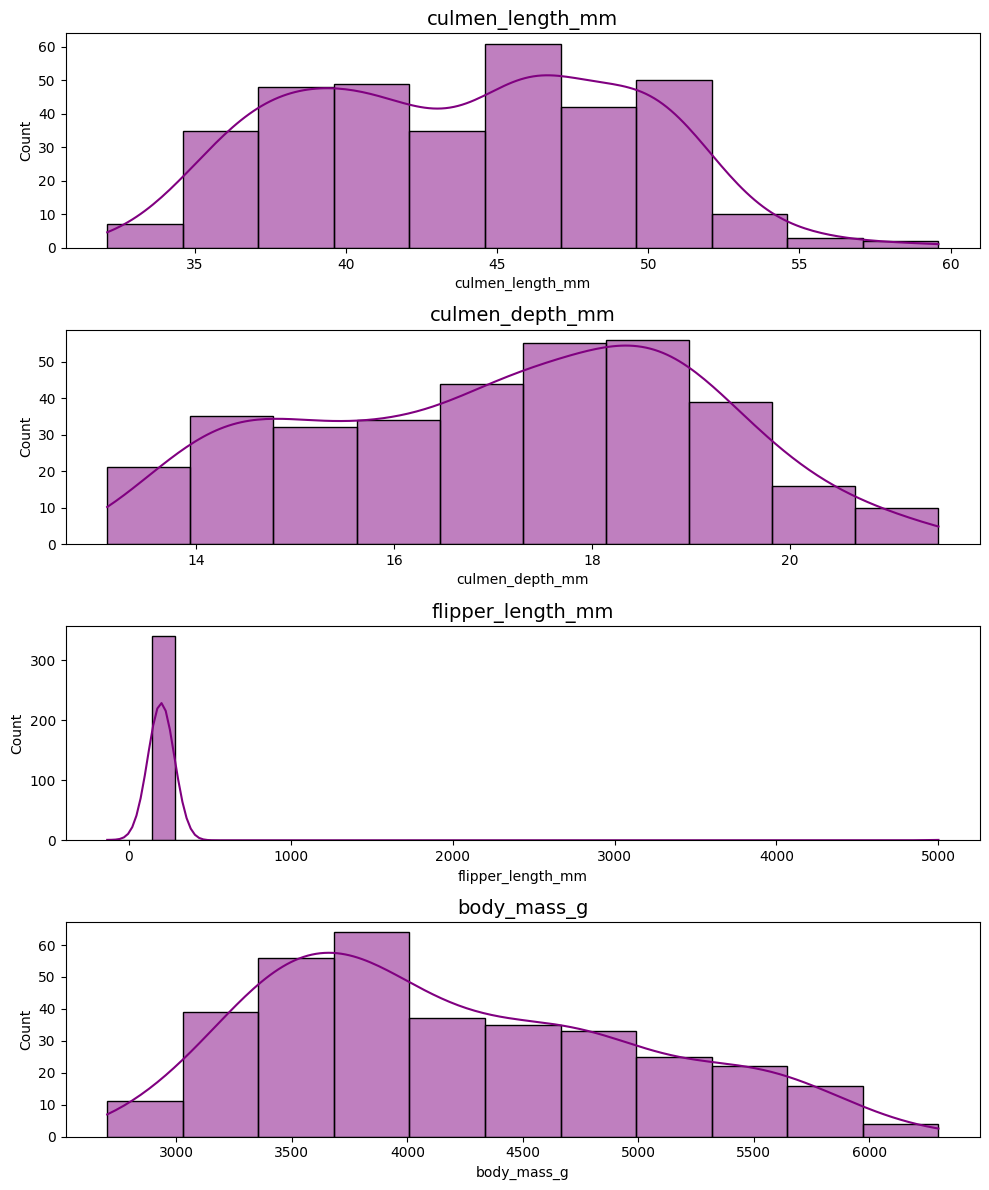

In [248]:
x_numeric = df.columns[:-1].to_list()

def SkewGraph(df):
    plt.figure(figsize=(10, 12))
    for i, col in enumerate(df.columns):
        skew_val = df[col].skew()
        plt.subplot(len(df.columns), 1, i + 1)
        sns.histplot(df[col], kde=True, color='purple')
        plt.title(f"{col}", fontsize=14)
    plt.tight_layout()
    plt.show()

SkewGraph(df[x_numeric])

In [249]:
marks += 4

## Data Cleaning

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p> <b>Perform the necessary data cleaning, which should include:</b> 
    
- Remove rows with missing or invalid sex. 

- Encode the sex variable to numerical values.    
    
- Remove outliers in flipper_length_mm.</p>
    
<b>Insert your code cell after this.</b>    
</div>

In [250]:
df_zscore = df[(np.abs(zscore(df["flipper_length_mm"])) < 3)]
df_out = df_zscore[df_zscore["flipper_length_mm"] > 0]

df_droped = df_out.dropna(axis=0)

key = {'MALE': 0, 'FEMALE': 1}
df_sex = df_droped["sex"].map(key).to_frame()
df_encoded = df_droped.copy()
df_encoded["sex"] = df_sex


In [251]:
marks += 4

## Scatter plots of data

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Create a pairwise scatter plot matrix of all the <b>features</b> except <b>sex</b> in the data.</p>
    
<b>Insert your code cell after this.</b>    
</div>

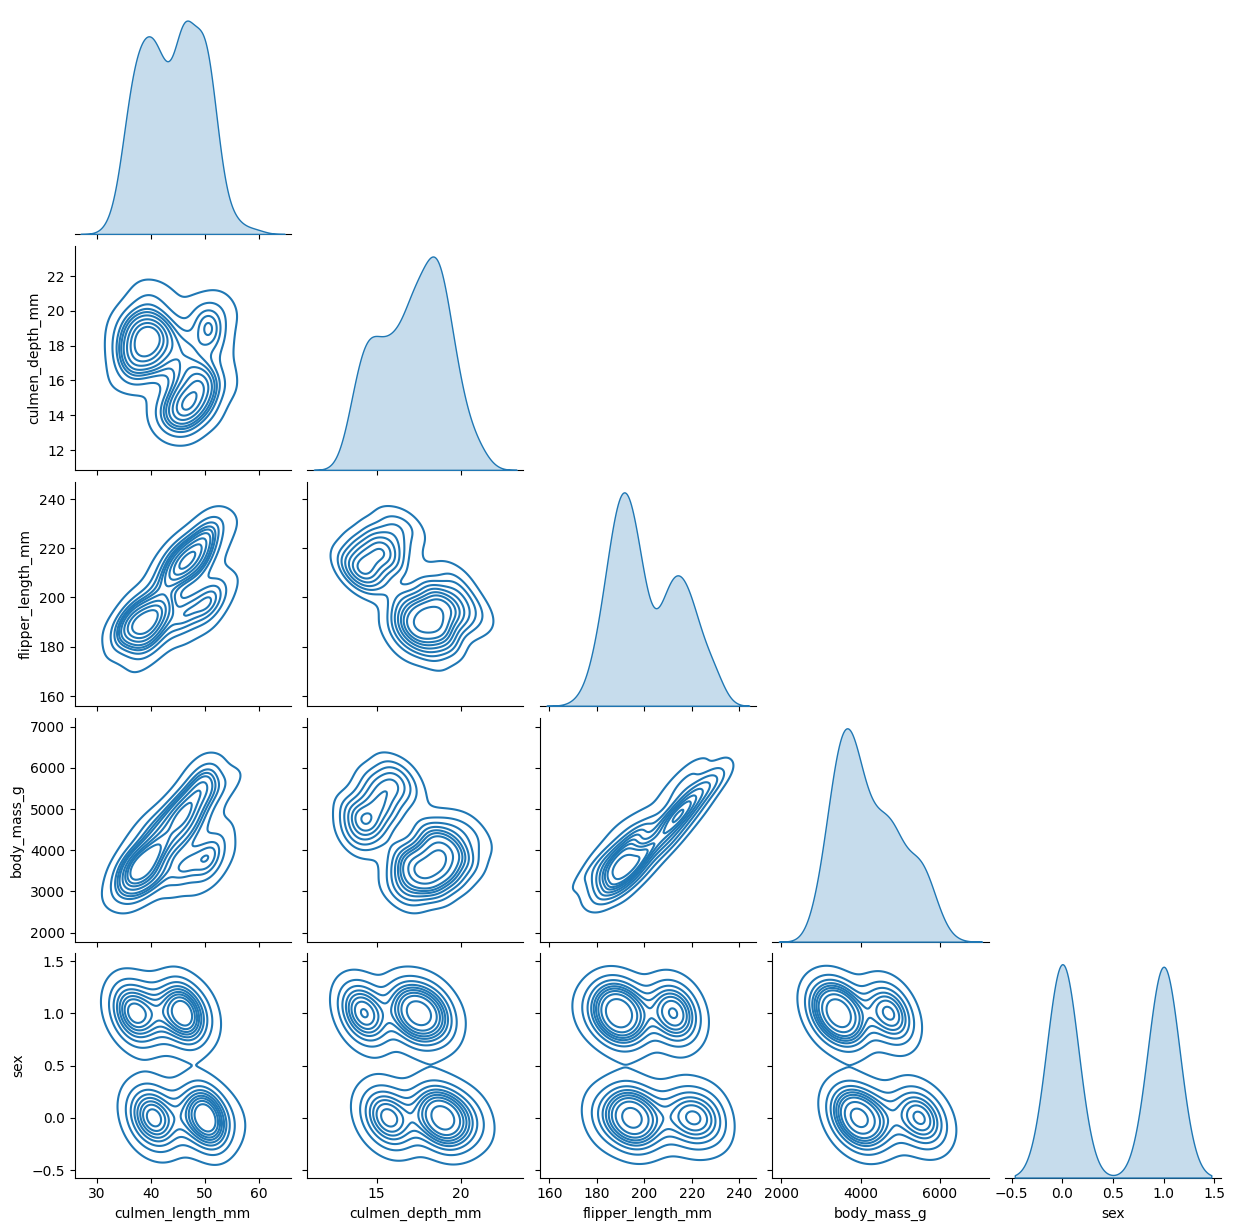

In [252]:
sns.pairplot(df_encoded, corner=True, kind="kde") # 
plt.show()

In [253]:
marks += 4

## Feature Scaling

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Some variables will require scaling.
Show how you would decide on which variables require scaling (i.e. which plots could you use to make the decision).    
    
Perform feature scaling, using an appropriate scaler.     
    
    
<b>Insert your code cell after this.</b>
</p>
</div>

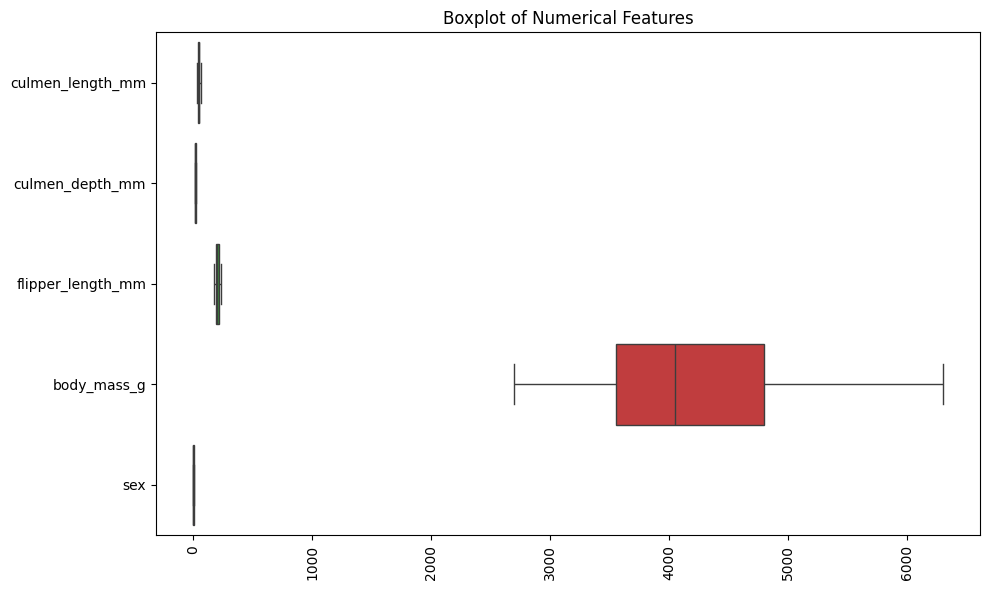

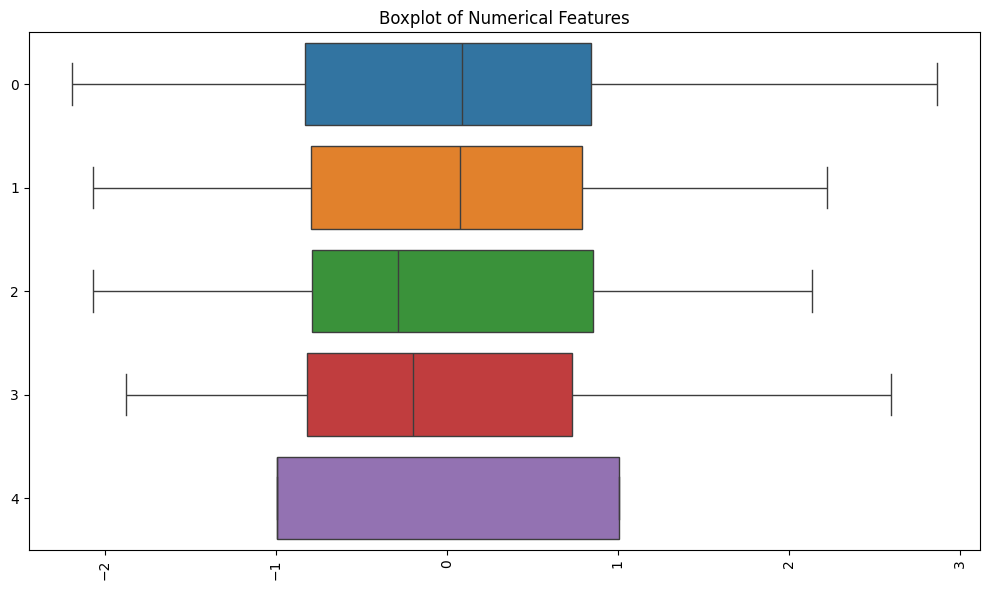

In [254]:
# 📦 Boxplot for numeric features (detect spread, skew, and outliers)
def boxPlot(df_encoded):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_encoded, orient='h')

    plt.title("Boxplot of Numerical Features")
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()
boxPlot(df_encoded)

ss = StandardScaler()
df_x_scaled = ss.fit_transform(df_encoded)
df_x_scaled = pd.DataFrame(df_x_scaled)
boxPlot(df_x_scaled)


In [255]:
marks += 2

## Determining clusters

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Determine the number of clusters to use in the K-Means algorithm using the <b>Elbow method</b> .</p>

<b>Insert your code cell after this.</b>
</div>

In [256]:
marks += 3

# Model

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Fit K-Means with chosen k.

<b>Display the first few rows of the dataframe of the result.</b> 

<b>Insert your code cell after this.</b>    
</p>
</div>

In [257]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df_x = df_x_scaled.dropna(axis=0)
display(df_x_scaled)
X_kmeans = df_x

# Step 2: Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_x['Cluster'] = kmeans.fit_predict(X_kmeans)

df_x.head()


,0,1,2,3,4
0,-0.905520,0.793126,-1.428125,-0.569709,-0.993994
1,-0.831938,0.128503,-1.071522,-0.507579,1.006042
2,-0.684775,0.435252,-0.429637,-1.191006,1.006042
3,-1.347011,1.099875,-0.572278,-0.942487,1.006042
4,-0.868729,1.764498,-0.786240,-0.693968,-0.993994
...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.006042
329,0.510929,-1.456367,0.996775,0.797145,1.006042
330,1.173166,-0.740619,1.496019,1.915480,-0.993994
331,0.216602,-1.200743,0.782813,1.232053,1.006042


C:\Users\local_600367\Temp\ipykernel_74600\3085001656.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Cluster'] = kmeans.fit_predict(X_kmeans)


,0,1,2,3,4,Cluster
0,-0.905520,0.793126,-1.428125,-0.569709,-0.993994,0
1,-0.831938,0.128503,-1.071522,-0.507579,1.006042,2
2,-0.684775,0.435252,-0.429637,-1.191006,1.006042,2
3,-1.347011,1.099875,-0.572278,-0.942487,1.006042,2
4,-0.868729,1.764498,-0.786240,-0.693968,-0.993994,0


In [258]:
marks += 3

# Model Evaluation

## Scatter plot

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Create a scatter plot to visualise the clusters.

<b>Insert your code cell after this.</b>    
</p>
</div>

In [259]:
sns.scatterplot(data=df_x, x='culmen_length_mm', y='culmen_depth_mm', hue='Cluster', palette='Set2')
plt.title('K-Means Clusters with KDE by Cluster')
plt.legend()
plt.show()

ValueError: Could not interpret value `culmen_length_mm` for `x`. An entry with this name does not appear in `data`.

In [ ]:
marks += 3

### Statistical Analysis

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p>Group the dataset by the cluster labels and <b>calculate the mean of each feature</b> for every cluster.

<b>Insert your code cell after this.</b>        
</p>
</div>

In [ ]:
marks += 3

### Cluster Identification

<div class="alert alert-danger alertdanger" style="margin-top: 1px">
<p> Describe what distinguishes each cluster, and how many species you believe are represented.
    
<b>Insert your answer in the following cell.</b>        
</p>
</div>

In [ ]:
marks += 3

<b><font size="5">Total Marks:</font></b>

In [ ]:
print(f"Total Marks = {marks} / 35")

Total Marks = 35 / 35
